In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('amoxi_dus.csv')

# Filter out non-positive values in 'diff' column
#df = df[df['diff'] > 0]
# Add a new column 'log_diff' which is the logarithm of the 'diff' column
df['log_diff'] = np.log(df['diff'])

# Display the first few rows of the DataFrame to verify the new column
df.head()


c:\Users\ericf\miniconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Unnamed: 0,cdm_name,group_level,min_data,max_data,shortage_year,estimate_before,estimate_after,diff,variable_level,country,data_type,set,variable_name,log_diff
0,1,INT,amoxicillin,2010,2024,2023,36.500000,45.70,1.252055,Male,Italy,secondary,inc,NaN,0.224786
1,2,OLVA MS,amoxicillin,2015,2024,2023,22.666667,11.75,0.518382,Age,Belgium,secondary,inc,NaN,-0.657042
2,3,OPCRD,amoxicillin,2010,2024,2023,30.333333,43.00,1.417582,Age,UK,primary,inc,NaN,0.348953
3,4,THIN Romania,amoxicillin,2010,2023,2023,15.666667,11.00,0.702128,Age,Romania,claims P+S,inc,NaN,-0.353640
4,5,ULSGE,amoxicillin,2010,2023,2023,15.000000,11.00,0.733333,Age,Portugal,secondary,inc,NaN,-0.310155


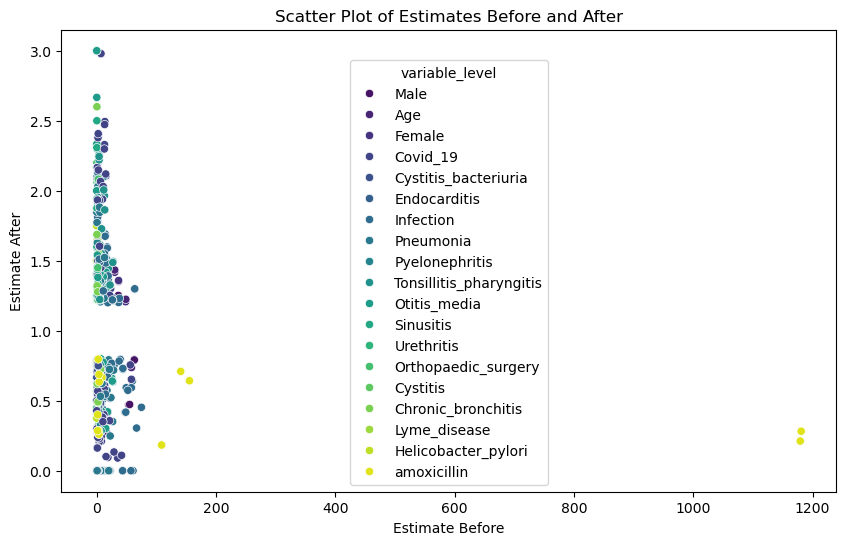

In [7]:

# Create a scatter plot
#plt.figure(figsize=(10, 6))
#scatter_plot = sns.scatterplot(data=df, x='estimate_before', y='estimate_after', hue='variable_level', palette='viridis')

plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=df, x='estimate_before', y='diff', hue='variable_level', palette='viridis')

# Add labels and title
plt.xlabel('Estimate Before')
plt.ylabel('Estimate After')
plt.title('Scatter Plot of Estimates Before and After')

# Show the plot
plt.show()

In [55]:
# Indication on index date

import plotly.express as px

# Filter the dataframe
filtered_df = (
    df
    .query("variable_name == 'Indication on index date'")
    .query("set == 'prev'")
)

# Create an interactive scatter plot
fig = px.scatter(
    filtered_df,
    x='variable_level',
    y='log_diff',
    color='country',
    title='Scatter Plot of Log Difference by Indication, Colored by Country',
    labels={
        'variable_level': 'Variable Level',
        'log_diff': 'Difference'
    },
    color_discrete_sequence=px.colors.qualitative.G10
)

# Rotate x-axis labels for better readability
fig.update_layout(
    xaxis_tickangle=-45
)

# Show the plot
fig.show()

In [35]:
# Filter the DataFrame for variable_level equal to 'Covid_19'

import plotly.express as px

# Filter the dataframe as needed
filtered_df = (
    df
    .query("variable_level == 'Covid_19'")
    .query("variable_name == 'Indication on index date'")
    .query("set == 'inc'")
)

# Create the interactive scatter plot
fig = px.scatter(
    filtered_df,
    x='country',
    y='log_diff',
    color='country',
    labels={'country': 'Country', 'log_diff': 'Difference'},
    title='Scatter Plot of Difference by Country for Variable Level Covid_19',
    color_discrete_sequence=px.colors.qualitative.G10 #Alphabet
)

# Update layout for better readability
fig.update_layout(
    xaxis=dict(tickangle=45),
    width=1200,
    height=800
)

# Show the plot
fig.show()

In [32]:
import plotly.express as px

# Filter the dataframe as needed
filtered_df = df.query("set == 'inc'").sort_values(['variable_level', 'variable_name'])

# Create a new column that combines 'variable_name' and 'variable_level' for the x-axis
filtered_df['variable_combined'] = filtered_df['variable_level'] + ' - ' + filtered_df['variable_name']

# Create the interactive scatter plot
fig = px.scatter(
    filtered_df,
    x='variable_combined',
    y='log_diff',
    color='country',
    labels={'variable_combined': 'Variable Name - Variable Level', 'log_diff': 'Difference'},
    title='Scatter Plot of Difference by Variable Level, Colored by Country',
    #color_discrete_sequence=px.colors.qualitative.Colorblind
)

# Update layout for better readability
fig.update_layout(
    xaxis=dict(tickangle=45),
    width=1200,
    height=800
)

# Show the plot
fig.show()


In [53]:
import pandas as pd
import plotly.express as px

# Filter the DataFrame
filtered_df = df.query("variable_name == 'Indication on index date'").query("set == 'prev'")

# Create an interactive scatter plot
fig = px.scatter(
    filtered_df,
    x='variable_level',
    y='log_diff',
    color='country',
    title='Scatter Plot of Difference by Variable Level, Colored by Country',
    labels={
        'variable_level': 'Variable Level',
        'log_diff': 'Difference'
    },
    color_continuous_scale='Viridis'
)

# Update layout for better readability
fig.update_layout(
    xaxis_title='Variable Level',
    yaxis_title='Difference',
    xaxis_tickangle=45,
    template='plotly_white'
)

# Show the plot
fig.show()

In [50]:
# Most frequent variable_levels
variable_level_counts_df = (
    df
    .query("variable_name == 'Indication on index date'")
    .query("set == 'inc'")
    #.query("set == 'prev'")
    #
    .groupby(['variable_level', 'variable_name'])        # Group by 'variable_level'
    .size()                           # Count occurrences of each group
    .reset_index(name='count')        # Convert Series to DataFrame and rename the count column
    .sort_values(by='count', ascending=False)  # Sort by count in descending order
)
variable_level_counts_df

,variable_level,variable_name,count
6,Infection,Indication on index date,15
1,Covid_19,Indication on index date,13
9,Pneumonia,Indication on index date,11
12,Tonsillitis_pharyngitis,Indication on index date,11
8,Otitis_media,Indication on index date,9
3,Cystitis_bacteriuria,Indication on index date,7
11,Sinusitis,Indication on index date,6
0,Chronic_bronchitis,Indication on index date,5
5,Helicobacter_pylori,Indication on index date,2
2,Cystitis,Indication on index date,1


In [51]:
# Most frequent variable_levels
variable_level_counts_df = (
    df
    #.query("variable_name == 'Indication on index date'")
    .query("set == 'inc'")
    #.query("set == 'prev'")
    .query("variable_name.isnull()")
    #
    #.groupby(['variable_level', 'variable_name'])        # Group by 'variable_level'
    .groupby(['variable_level'])        # Group by 'variable_level'
    .size()                           # Count occurrences of each group
    .reset_index(name='count')        # Convert Series to DataFrame and rename the count column
    .sort_values(by='count', ascending=False)  # Sort by count in descending order
)
variable_level_counts_df

,variable_level,count
0,Age,5
2,Male,3
1,Female,1
